In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# **Loading the dataset**

In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/webeet_daily_tasks/day_two/high-school-directory.csv'
df = pd.read_csv(file_path)

df.head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Council District,Census Tract,BIN,BBL,NTA,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12


# **Cleaning**

In [ ]:
import re

def clean_column(col):
    col = col.lower()
    col = re.sub(r'[^\w\s]', '', col)  #remove special characters
    col = col.replace(' ', '_')        #replace spaces with _
    return col

df.columns = [clean_column(col) for col in df.columns]

#show cleaned columns
df.columns


Index(['dbn', 'school_name', 'borough', 'building_code', 'phone_number',
       'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min',
       'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city',
       'state_code', 'postcode', 'website', 'total_students', 'campus_name',
       'school_type', 'overview_paragraph', 'program_highlights',
       'language_classes', 'advancedplacement_courses', 'online_ap_courses',
       'online_language_courses', 'extracurricular_activities',
       'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed',
       'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered',
       'partner_cultural', 'partner_nonprofit', 'partner_corporate',
       'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2',
       'start_time', 'end_time', 'se_services', 'ell_programs',
       'school_accessibility_description', 'number_programs', 'priority01',
       'priority02', 'priority03', 'priority04', 'prior

# **Schools located in Brooklyn**

In [ ]:
#filter to Brooklyn
brooklyn_df = df[df['borough'] == 'Brooklyn']

#preview
brooklyn_df.head()


,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
7,17K122,Pathways in Technology Early College High Scho...,Brooklyn,K625,718-221-1593,718-221-1781,9.0,12,9.0,14.0,...,36.0,311.0,3030553.0,3.012160e+09,Crown Heights North ...,17615.0,16,2,49,49
10,23K644,Eagle Academy for Young Men II,Brooklyn,K271,718-495-0863,718-732-2129,6.0,12,NaN,NaN,...,41.0,301.0,3042157.0,3.015500e+09,Ocean Hill ...,13516.0,55,2,17,46
12,15K462,Secondary School for Law,Brooklyn,K460,718-832-4250,718-499-3947,9.0,12,NaN,NaN,...,39.0,155.0,3025510.0,3.010820e+09,Park Slope-Gowanus ...,17617.0,14,2,27,50


In [ ]:
print(f"Total schools in Brooklyn: {len(brooklyn_df)}")


Total schools in Brooklyn: 121


# **How many offer Grade 9 entry?**

In [ ]:
#filter Brooklyn schools with grade 9 as min entry grade
grade9_schools = brooklyn_df[brooklyn_df['grade_span_min'] == 9.0]

#count them all
print(f"Brooklyn schools offering Grade 9 entry: {len(grade9_schools)}")


Brooklyn schools offering Grade 9 entry: 98


# **Count of schools per borough**

In [ ]:
school_counts = df.groupby('borough')['dbn'].nunique()
print(school_counts)

borough
Bronx            118
Brooklyn         121
Manhattan        106
Queens            80
Staten Island     10
Name: dbn, dtype: int64


# **Average number of students per borough**

In [ ]:
average_students = df.groupby('borough')['total_students'].mean().round(2)
print(average_students)


borough
Bronx             490.41
Brooklyn          699.13
Manhattan         589.83
Queens           1046.64
Staten Island    1847.50
Name: total_students, dtype: float64


# **Summary of grade_span_max grouped by borough**

In [ ]:
grade_span_summary = df.groupby('borough')['grade_span_max'].describe()
print(grade_span_summary)

               count       mean       std   min   25%   50%   75%   max
borough                                                                
Bronx          118.0  11.906780  0.369506   9.0  12.0  12.0  12.0  12.0
Brooklyn       121.0  11.933884  0.381566   9.0  12.0  12.0  12.0  12.0
Manhattan      106.0  11.877358  0.472135   9.0  12.0  12.0  12.0  12.0
Queens          80.0  11.825000  0.497462  10.0  12.0  12.0  12.0  12.0
Staten Island   10.0  12.000000  0.000000  12.0  12.0  12.0  12.0  12.0


# **Bar chart: Number of schools per borough**

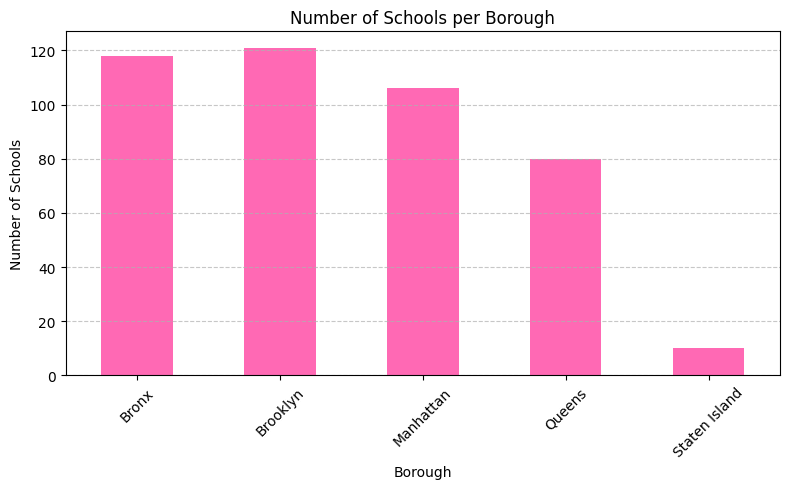

In [ ]:
import matplotlib.pyplot as plt

#bar chart: number of schools per borough
school_counts = df.groupby('borough')['dbn'].nunique()

plt.figure(figsize=(8, 5))
school_counts.plot(kind='bar', color='#FF69B4')

plt.title('Number of Schools per Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Schools')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Key Insights:

• Brooklyn has the highest number of high schools (121), followed closely by the Bronx (118) and Manhattan (106). Staten Island has only 10.

• Most schools in all boroughs go up to Grade 12, with very little variation in grade_span_max.

• 98 schools in Brooklyn offer Grade 9 entry, showing a wide entry point for students starting high school in that borough.